# **Import data and package**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from PIL import Image
from sklearn import utils
%matplotlib inline

# **Load image and display**

In [4]:
# Load original image
def load_image(filepath):
  im = cv2.imread(filepath, 1)
  imrgb= im[:, :, ::-1]
  r, c, t = im.shape
  return imrgb, r, c, t

In [5]:
#display
def display_image(imagepath):
  plt.imshow(imagepath)
  plt.show()

# ***Load random number from log file***

In [6]:
def log_to_mask(filepath, r, c, t):
  file = open(filepath, 'rb')
  rdnums= file.read(r*c*t)
  mask= []
  for rdnum in rdnums:
    mask.append(rdnum)
  mask= np.asarray(mask)
  mask= mask[0:r*c*t].reshape(r, c, t)
  return mask

**Turn random number into image**

In [7]:
def num_to_img(nums, r, c, imgname):
  bits = np.unpackbits(np.array(nums[28:len(nums)]).astype(np.uint8)) * 255
  fp = bits[0:r*c].reshape((r, c))
  fp_pil = Image.fromarray(fp, 'L')
  fp_pil.save(imgname+ '.png')

# **Encryption: XOR image with the noise mask**

In [8]:
def encryption(origin_image, mask, r, c, t):
  encrypted_image = np.zeros((r, c, t), np.uint8)
  for row in range(r):
      for column in range(c):
          for depth in range(t):
              encrypted_image[row, column, depth] = origin_image[row, column, depth] ^ mask[row, column, depth] 
  return encrypted_image

**verify**

In [9]:
def decryption(image, mask, r, c, t):
  decrypted_image= encryption(image, mask, r, c, t)
  return decrypted_image

In [10]:
def verify(encrypted_image, mask, r, c, t):
  decrypted_image= decryption(encrypted_image, mask, r, c, t)
  display_image(decrypted_image)

# **Comparasion: using hamming weighted to input data**

In [28]:
def hamming_weighted(num):
  size= int(num*r*c*t/100)
  keynum = random.randint(1, 256, size = size)
  keyadd= np.full(r*c*t-size, 0)
  keynum= np.concatenate((keynum, keyadd))
  keynum= utils.shuffle(keynum)
  keynum= keynum[0:r*c*t].reshape(r, c, t)
  return keynum

# **Main Process of Steganography**

**Using log file as the noise mask**

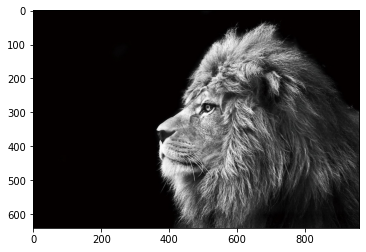

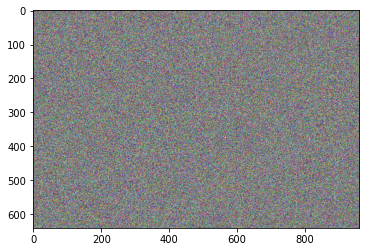

In [12]:
#load imagine
image, r, c, t= load_image('/content/drive/MyDrive/ML/lion.jpeg')
display_image(image)
#import noise mask
mask= log_to_mask('/content/drive/MyDrive/ML/putty.log', r, c, t)
###test
num_to_img(mask, r, c, 'mask')
#encryption
encryptedimg= encryption(image, mask, r, c, t)
#display result
display_image(encryptedimg)
###verify
# verify(encryptedimg, mask, r, c, t)

**Using hamming weighted 49%, 50%, 51% as the noise mask**

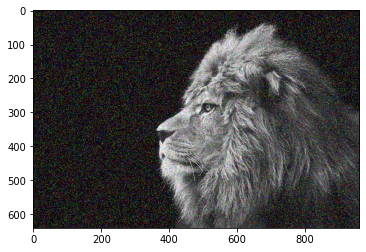

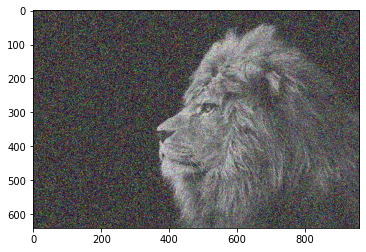

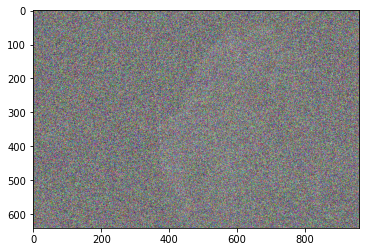

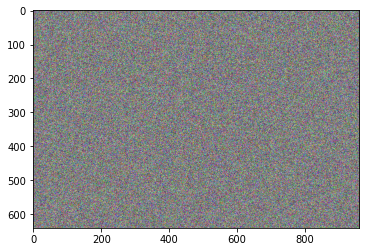

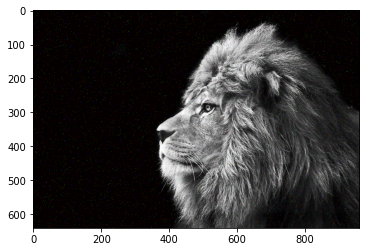

In [31]:
ham_list= [20, 50, 95, 100, 1]
for ham in ham_list:
  masknum= hamming_weighted(ham)
  
  num_to_img(masknum, r, c, 'hamming'+ chr(ham))

  image2, r, c, t= load_image('/content/drive/MyDrive/ML/lion.jpeg')
  encryptedimg2= encryption(image2, masknum, r, c, t)
  display_image(encryptedimg2)

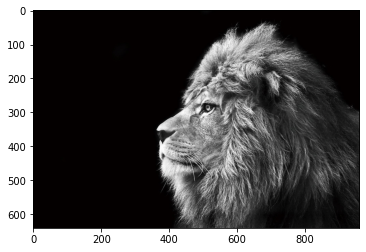

In [14]:
key0 = random.randint(0, 2, size = (r, c, t))

image3, r, c, t= load_image('/content/drive/MyDrive/ML/lion.jpeg')
encryptedimg2= encryption(image3, key0, r, c, t)
display_image(encryptedimg2)


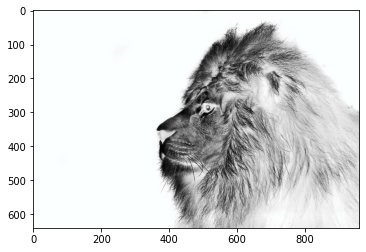

In [15]:
key1 = random.randint(255, 256, size = (r, c, t))

image4, r, c, t= load_image('/content/drive/MyDrive/ML/lion.jpeg')
encryptedimg2= encryption(image4, key1, r, c, t)
display_image(encryptedimg2)

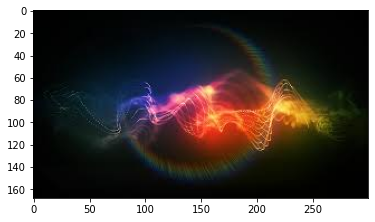

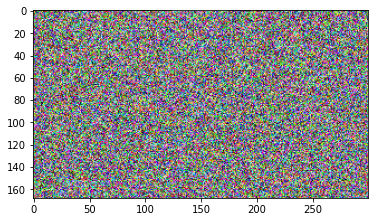

In [16]:
#load imagine
imagecolorful, r, c, t= load_image('/content/drive/MyDrive/ML/colorful.jpeg')
display_image(imagecolorful)
#import noise mask
maskcolorful= log_to_mask('/content/drive/MyDrive/ML/putty.log', r, c, t)
###test
num_to_img(maskcolorful, r, c, 'maskcolorful')
#encryption
encryptedimgcolorful= encryption(image, maskcolorful, r, c, t)
#display result
display_image(encryptedimgcolorful)
###verify
# verify(encryptedimg, mask, r, c, t)

# **Hamming Process**

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
hamming weighted: 
0




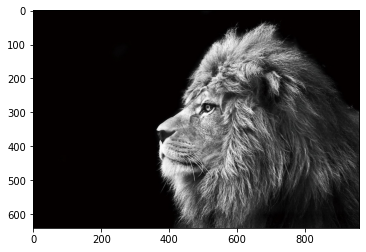

hamming weighted: 
5




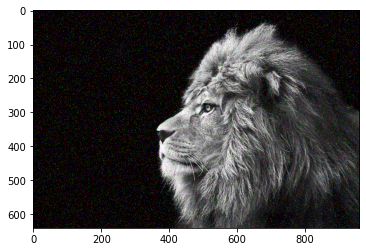

hamming weighted: 
10




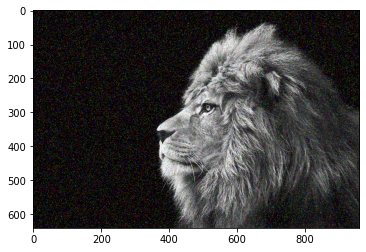

hamming weighted: 
15




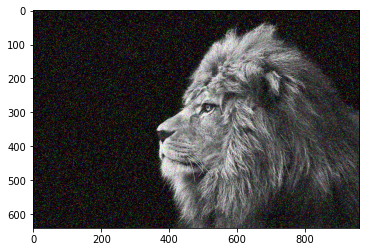

hamming weighted: 
20




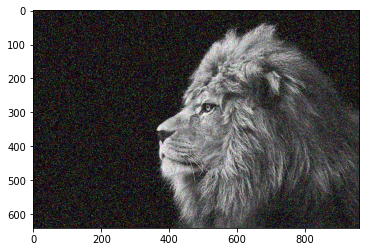

hamming weighted: 
25




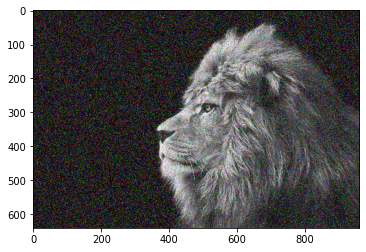

hamming weighted: 
30




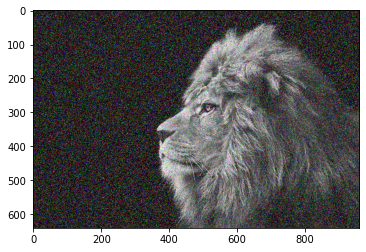

hamming weighted: 
35




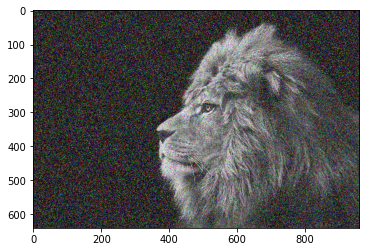

hamming weighted: 
40




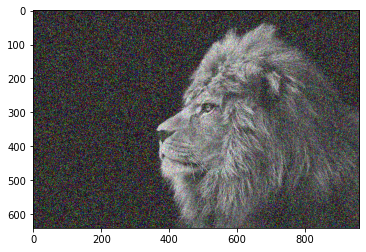

hamming weighted: 
45




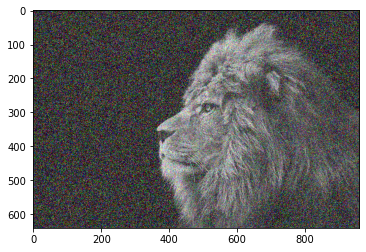

hamming weighted: 
50




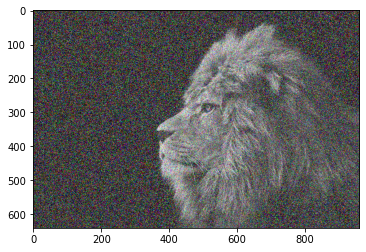

hamming weighted: 
55




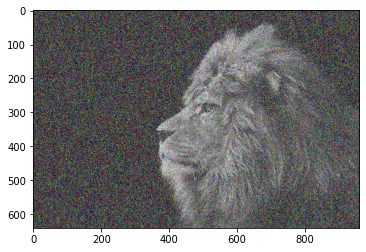

hamming weighted: 
60




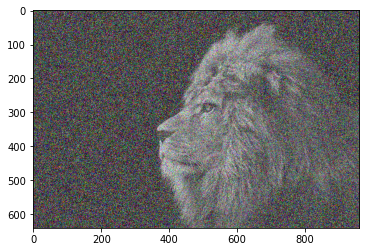

hamming weighted: 
65




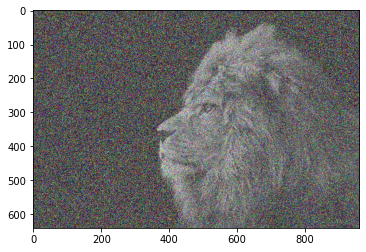

hamming weighted: 
70




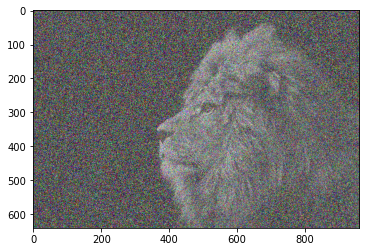

hamming weighted: 
75




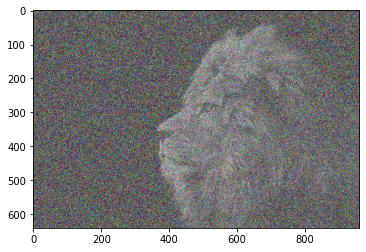

hamming weighted: 
80




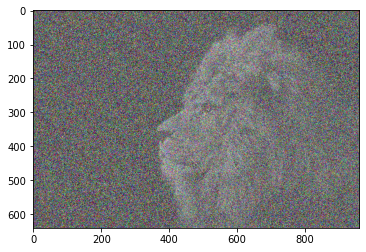

hamming weighted: 
85




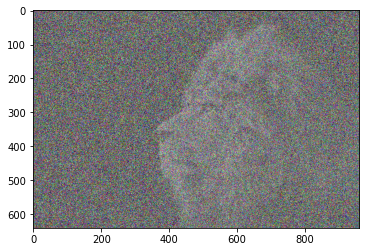

hamming weighted: 
90




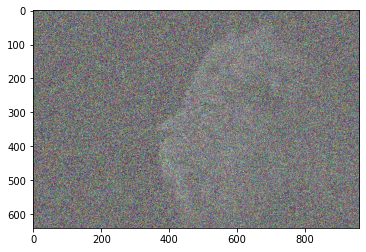

hamming weighted: 
95




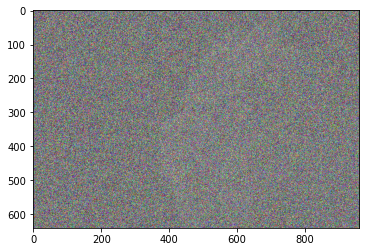

hamming weighted: 
100




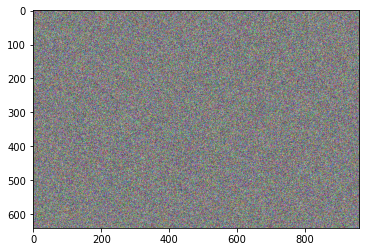

In [30]:
ham_list_colorful= []
for i in range(0, 21):
  if(i == 0):
    time = i
  else:
    time= i * 5
  ham_list_colorful.append(time)
print(ham_list_colorful)
for hamcolorful in ham_list_colorful:
  masknumcolorful2= hamming_weighted(hamcolorful)
  
  num_to_img(masknumcolorful2, r, c, 'hammingcolorful'+ chr(ham))

  imagecolorful2, r, c, t= load_image('/content/drive/MyDrive/ML/lion.jpeg')
  encryptedimg2colorful= encryption(imagecolorful2, masknumcolorful2, r, c, t)
  print("hamming weighted: ")
  print(hamcolorful)
  print("\n" )
  display_image(encryptedimg2colorful)